In [68]:
import os
from pathlib import Path
from astropy.io import fits
import numpy as np

#pad naar de betreffende metingen, deze moet veranderd worden
path = "C:/Users/Arnau/Documents/NS Practicum 2/Zonnefysica Experiment/"
files =  [ p for p in Path(path).glob('*.fit') ]

data_dict = dict()
for file in files:
    data_dict[os.path.basename(file)] = fits.getdata(file)

In [69]:
data_headers = dict()
for x in data_dict.keys():
    data_headers[x] = fits.getheader(path + x)

In [70]:
data_dict['neon-0001.fit']

array([[ 992, 1055, 1034, ...,  730,  836,  313],
       [1068,  971,  967, ...,  756,  747,  342],
       [1015, 1030, 1043, ...,  738,  764,  331],
       ...,
       [ 992, 1063,  950, ...,  886,  914,  298],
       [1025, 1037, 1066, ...,  901,  899,  311],
       [1047, 1007, 1106, ...,  968,  935,  304]], dtype=uint16)

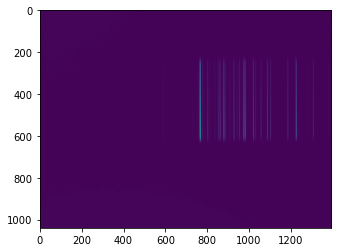

In [71]:
import matplotlib.pyplot as plt 
plt.imshow(data_dict['neon-0001.fit'])

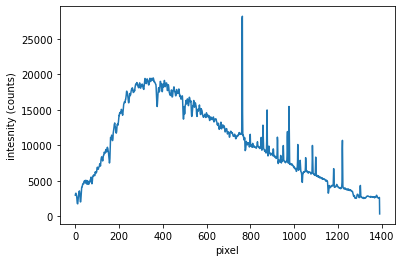

In [72]:
stack = np.median([x for x in data_dict.values()], axis=0)
spectrum = np.median(stack[0:700], axis=0)
#plt.xticks(range(0, 1500, 100))
plt.xlabel('pixel')
plt.ylabel('intesnity (counts)')
plt.plot(spectrum)

In [73]:
#determining the minimal values
from scipy.signal import argrelextrema

maxima = argrelextrema(spectrum, np.greater)
len(maxima[0])

255

In [74]:
for i in maxima[0]:
    print(f'{i} : {spectrum[i]}')

3 : 3230.75
19 : 3553.25
37 : 4645.25
41 : 4951.75
43 : 4947.5
46 : 5046.75
52 : 5028.25
57 : 4953.5
64 : 4896.5
66 : 4846.25
72 : 5502.0
81 : 5685.25
85 : 5824.25
87 : 5788.75
91 : 6230.25
96 : 6286.0
101 : 6901.75
112 : 7401.75
120 : 8341.0
122 : 8295.25
132 : 9008.25
140 : 9396.0
147 : 9707.0
149 : 9445.25
162 : 11100.25
166 : 11416.25
180 : 13137.25
183 : 12596.5
186 : 11890.5
193 : 12958.25
200 : 14213.25
203 : 14548.0
206 : 14658.25
210 : 15045.75
226 : 16125.25
229 : 16428.75
235 : 17622.5
249 : 17292.0
258 : 18013.25
261 : 18075.25
269 : 17818.5
276 : 18586.25
279 : 18701.75
281 : 18833.25
285 : 18552.75
294 : 18789.25
303 : 18557.0
306 : 18613.75
319 : 19403.25
328 : 19359.5
341 : 19442.25
349 : 19415.5
353 : 19311.75
356 : 19482.75
361 : 18996.5
381 : 18117.25
384 : 17677.75
389 : 18996.5
392 : 18664.25
400 : 18632.75
407 : 19130.0
414 : 18732.25
417 : 18772.0
424 : 18523.25
432 : 17241.5
439 : 17791.5
450 : 18215.5
463 : 17855.25
469 : 17362.5
473 : 17933.0
478 : 17045.0
486

In [75]:
from scipy.signal import find_peaks, peak_prominences

peaks, _ = find_peaks(spectrum)
peaks

array([   3,   19,   37,   41,   43,   46,   52,   57,   64,   66,   72,
         81,   85,   87,   91,   96,  101,  112,  120,  122,  132,  140,
        147,  149,  162,  166,  180,  183,  186,  193,  200,  203,  206,
        210,  226,  229,  235,  249,  258,  261,  269,  276,  279,  281,
        285,  294,  303,  306,  319,  328,  341,  349,  353,  356,  361,
        381,  384,  389,  392,  400,  407,  414,  417,  424,  432,  439,
        450,  463,  469,  473,  478,  486,  488,  497,  506,  513,  521,
        528,  537,  541,  547,  558,  563,  567,  575,  586,  591,  599,
        604,  607,  610,  619,  622,  624,  627,  631,  636,  642,  649,
        654,  660,  665,  670,  674,  680,  691,  699,  702,  708,  710,
        712,  717,  723,  728,  735,  740,  744,  748,  750,  753,  757,
        763,  767,  773,  781,  783,  789,  793,  799,  803,  807,  810,
        816,  818,  821,  823,  832,  836,  840,  849,  857,  867,  869,
        876,  884,  889,  894,  898,  904,  910,  9

In [76]:
prominences = peak_prominences(spectrum, peaks)[0]
len(prominences)

255

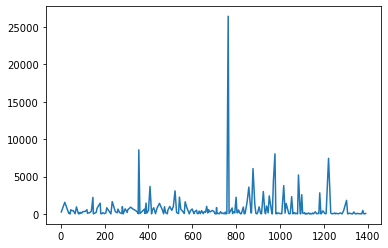

In [77]:
plt.plot(peaks, prominences)

In [80]:
filtered = []
filtered_pixel = []
n=0
for i in prominences:
    if i > 1000:
        filtered.append(i)
        filtered_pixel.append(peaks[n])
    n+=1

#dit is eigenlijk om van het aantal counts naar de distributie te gaan (spectral irradiance)
# deze is waarschijnlij niet correct en dient veranderd te worden
filtered_new = [x/30000 for x in filtered]
filtered_pixel

[19,
 147,
 180,
 235,
 356,
 389,
 407,
 450,
 521,
 541,
 567,
 665,
 763,
 799,
 849,
 857,
 876,
 884,
 923,
 938,
 950,
 969,
 976,
 1016,
 1027,
 1052,
 1083,
 1098,
 1180,
 1220,
 1302]

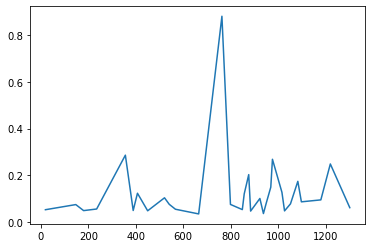

In [81]:
plt.plot(filtered_pixel, filtered_new)

In [82]:
#dient verder aangepast te worden voor het vergelijken met de bekende neon-golflengtelijnen
#deze lijne zijn in een plaatje weergeven van de opdracht maandag maar is niet in een file gedaan.
# tips: niet alle punten hoeven in de fit voor de ijking, neem slechts een aantal golflengtes/pixel nums

#kan ook met zon & fraunhoverlijnen

TypeError: Field elements must be 2- or 3-tuples, got '0.051816666666666664'